In [19]:
# %load_ext autoreload
# %autoreload 2
from memex import set_voltage_4
from memex import sram
import board
import busio
import time

import RPi.GPIO as GPIO
GPIO.setmode(GPIO.BCM)            # choose BCM or BOARD  

#set voltage for memory
set_voltage_4({'a':3.29})

#Set output enable high
GPIO.setup(26, GPIO.OUT) # set a port/pin as an output   
GPIO.output(26, 1)       # set port/pin value to 1/GPIO.HIGH/True  

#set hold pin high
GPIO.setup(19, GPIO.OUT) # set a port/pin as an output   
GPIO.output(19, 1)       # set port/pin value to 1/GPIO.HIGH/True  

spi = busio.SPI(board.SCLK,MOSI=board.MOSI,MISO=board.MISO)
spi.try_lock()
spi.configure(baudrate=10000000)
spi.unlock()

m1 = sram(spi,cs=board.D5,name="M1") # init m1

m1.write(0,70)

m1.read(0)

[70]

In [46]:

m1.fill(0)

GPIO.output(26, 0)  
set_voltage_4({'a':0.24}, debug=True)
time.sleep(1)
GPIO.output(26, 1)

set_voltage_4({'a':3.3})
m1.check(0)

0.23813226722006897 192 1


142438

In [6]:
[[0]*2]*10

[[0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0]]

In [14]:
set_voltage_4({'a':0.015}, debug=True)

0.02162565996276742 12 -1
0.02200067140720847 11 -1
0.02187566759239479 10 -1
0.021750663777581104 9 -1
0.02187566759239479 8 -1
0.02187566759239479 7 -1
0.02187566759239479 6 -1
0.02200067140720847 5 -1
0.02187566759239479 4 -1
Error in memex.set_voltage(): timed out


[[0.02162565996276742, 3],
 [0.500015259254738, 0],
 [0.5826427808465835, 0],
 [0.5473917050691245, 0]]

In [29]:
from IPython.display import clear_output

v_list = [0] * len(range(0,120))
bit_list = [0] * len(range(0,120))

for v in range(0,120):
    clear_output(wait=True)
    avg = 15
    sub_list = [0] * avg
    voltage = v/2/100
    print('v = '+str(voltage))
    print(v_list)
    print(bit_list)
    
    for i in range(avg):
        
        set_voltage_4({'a':3.3})
        m1.fill(0)
        GPIO.output(26, 0)  
        set_voltage_4({'a':voltage})
        time.sleep(0.25)
        GPIO.output(26, 1)
        
        set_voltage_4({'a':3.3})
        time.sleep(0.25)
        sub_list[i] = m1.check(0)
            
    v_list[v] = voltage
    bit_list[v] = sum(sub_list) / len(sub_list)
    

v = 0.595
[0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 0.105, 0.11, 0.115, 0.12, 0.125, 0.13, 0.135, 0.14, 0.145, 0.15, 0.155, 0.16, 0.165, 0.17, 0.175, 0.18, 0.185, 0.19, 0.195, 0.2, 0.205, 0.21, 0.215, 0.22, 0.225, 0.23, 0.235, 0.24, 0.245, 0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.28, 0.285, 0.29, 0.295, 0.3, 0.305, 0.31, 0.315, 0.32, 0.325, 0.33, 0.335, 0.34, 0.345, 0.35, 0.355, 0.36, 0.365, 0.37, 0.375, 0.38, 0.385, 0.39, 0.395, 0.4, 0.405, 0.41, 0.415, 0.42, 0.425, 0.43, 0.435, 0.44, 0.445, 0.45, 0.455, 0.46, 0.465, 0.47, 0.475, 0.48, 0.485, 0.49, 0.495, 0.5, 0.505, 0.51, 0.515, 0.52, 0.525, 0.53, 0.535, 0.54, 0.545, 0.55, 0.555, 0.56, 0.565, 0.57, 0.575, 0.58, 0.585, 0.59, 0]
[134038.66666666666, 134586.06666666668, 134555.0, 134471.86666666667, 134412.4, 134140.0, 134398.73333333334, 134430.06666666668, 134347.13333333333, 134287.26666666666, 134249.33333333334, 134151.53333333333, 134214.2

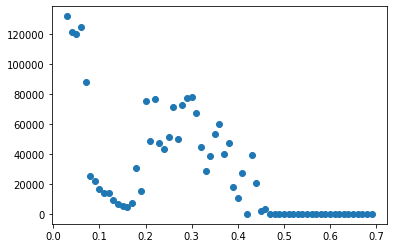

In [91]:
#plot_data = list(zip(range(0,70),v_list))[3::]

import matplotlib.pyplot as plt

plt.scatter([i[0]/100 for i in plot_data], [i[1] for i in plot_data])
plt.xlabel('Voltage [V]')
plt.ylabel('Upset Bits')

Text(0, 0.5, '% Upset Bits')

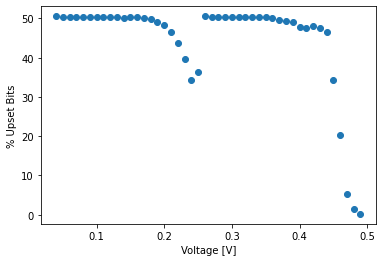

In [138]:
plot_data1 = list(zip(range(2,50),v_list))[2::]

import matplotlib.pyplot as plt

plt.scatter([i[0]/100 for i in plot_data1], [i[1] / (32*1024*8) * 100 for i in plot_data1])
plt.xlabel('Voltage [V]')
plt.ylabel('% Upset Bits')

Text(0, 0.5, '% Upset Bits')

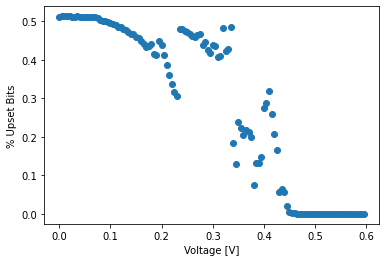

In [43]:
import matplotlib.pyplot as plt

plt.scatter(v_list, [i/(32*1024*8) for i in bit_list])
plt.xlabel('Voltage [V]')
#plt.xlim(0.2,0.3)
plt.ylabel('% Upset Bits')

In [40]:
bit_list[46]

80559.73333333334

In [42]:
v_list[46]

0.23

In [69]:
GPIO.output(26, 0) 
set_voltage_4({'a':0.03}, debug=True)

0.02800085451826533 24 1
0.029250892666402174 25 0
0.02912588885158849 25 0
0.029250892666402174 25 0
0.02912588885158849 25 0
0.029000885036774806 25 0
0.02937589648121586 25 0
0.029250892666402174 25 1
0.030250923184911648 26 0
Error in memex.set_voltage(): timed out


[[0.03037592699972533, 26],
 [0.5252660298471022, 0],
 [0.5815177465132603, 0],
 [0.5160157475508896, 0]]

In [30]:
def check_address(self,data_pattern): # compare every index of memory to data_pattern, return tally of mismatched bits
        tally = 0
        self.set_status() # set default status (sequential)
        
        bit_ls = [False] * self.size * 1024 * 8
        bit_addr = 0
        
        for block in range(self.size):
            data = self.read(1024*block,n=1024) # read 1024 bytes starting at 1024*block
            
            for byte in range(1024): # iterate over block
                if data[byte] != data_pattern: # if data doesn't match
                    for bit in range(8): # check each bit in the byte
                        tally += ((data[byte] ^ data_pattern) >> bit) & 0x01
                        if (((data[byte] ^ data_pattern) >> bit) & 0x01) == 1:
                            bit_ls[bit_addr] = True
                        
                        bit_addr += 1
                        
                else: #if data does match
                    bit_addr += 8
        return tally, bit_ls

In [22]:
ls = [[0,True]]*10

In [23]:
ls[0:8]

[[0, True],
 [0, True],
 [0, True],
 [0, True],
 [0, True],
 [0, True],
 [0, True],
 [0, True]]

In [18]:
ls

[[0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0]]

In [94]:
set_voltage_4({'a':3.3})

[[3.2999757072664573, 2649],
 [0.5426415601062045, 0],
 [0.5380164189580982, 0],
 [0.5501417889950254, 0]]